In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
#### LOAD DATA ####
data = pd.read_csv('./coronacases.csv',sep =',')
data = data[['id','cases']]
print('-'*30)
print('HEAD')
print('-'*30)
print(data.head())

------------------------------
HEAD
------------------------------
   id  cases
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0


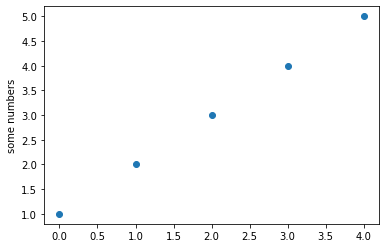

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4,5], 'o')
plt.ylabel('some numbers')
plt.show()

------------------------------
PREPARE DATA
------------------------------


Text(0.5, 0, 'Actual Data')

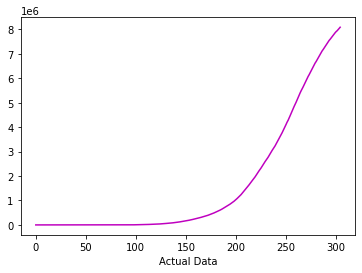

In [4]:
#### PREPARE DATA ####
print('-'*30);print('PREPARE DATA');print('-'*30)
x = np.array(data['id']).reshape(-1, 1)
y = np.array(data['cases']).reshape(-1, 1)
plt.plot(y,'-m')
plt.xlabel('Actual Data')

In [10]:
polyFeat = PolynomialFeatures(degree=6)
x = polyFeat.fit_transform(x)
print(x)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.19430400e+06
  8.38860800e+06 1.67772160e+07]
 [1.00000000e+00 1.00000000e+00 3.00000000e+00 ... 3.13810596e+10
  9.41431788e+10 2.82429536e+11]
 ...
 [1.00000000e+00 1.00000000e+00 3.03000000e+02 ... 3.90605026e+54
  1.18353323e+57 3.58610568e+59]
 [1.00000000e+00 1.00000000e+00 3.04000000e+02 ... 4.19970552e+54
  1.27671048e+57 3.88119986e+59]
 [1.00000000e+00 1.00000000e+00 3.05000000e+02 ... 4.51436287e+54
  1.37688068e+57 4.19948606e+59]]


In [11]:
#### TRAINING DATA ####
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)

------------------------------
TRAINING DATA
------------------------------
Accuracy:99.638 %


In [7]:
#### PREDICTION ####
days = 10
print('*'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Cases after {days} days:',end='')
print(round(int(model.predict(polyFeat.fit_transform([[293+days]])))/1000000,2),'Million')

******************************
PREDICTION
------------------------------
Prediction - Cases after 10 days:8.53 Million


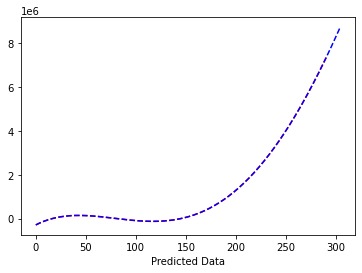

In [8]:
x1 = np.array(list(range(1,282+days))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y0,'--b')
plt.xlabel('Predicted Data')
plt.show()


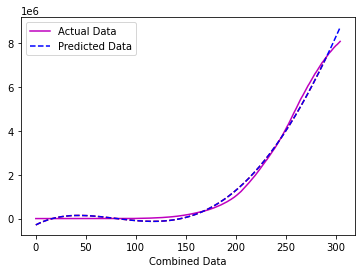

In [9]:
plt.plot(y,'-m' , label = 'Actual Data')
plt.plot(y1,'--r' )
plt.plot(y0,'--b', label= 'Predicted Data')
plt.legend(loc="upper left")
plt.xlabel('Combined Data')
plt.show()
